In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./ushape.csv')

In [3]:
df.columns = ['x', 'y', 'class']

In [4]:
df

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


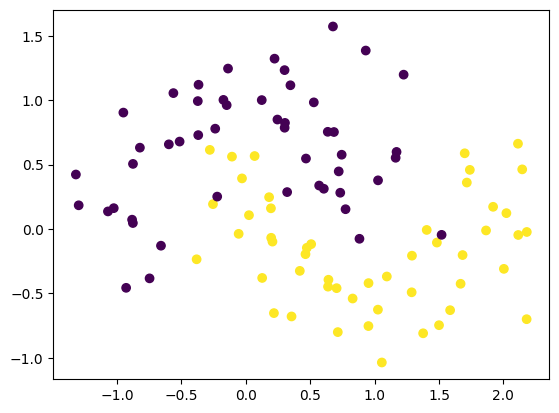

In [5]:
plt.scatter(df['x'], df['y'], c=df['class'])

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input


In [11]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.get_weights()

[array([[-0.49372435,  0.5536639 ,  0.01865977, -0.06548506,  0.6894862 ,
          0.5986213 ,  0.1350668 , -0.4342309 , -0.6923449 ,  0.46401435],
        [-0.30761686, -0.12275183, -0.5186633 , -0.06580895, -0.04996288,
          0.63730615, -0.48019066, -0.666002  , -0.54293925, -0.35504067]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.14654082],
        [ 0.6453145 ],
        [ 0.70302683],
        [ 0.45610756],
        [-0.65714645],
        [-0.25277814],
        [-0.47253123],
        [-0.48676232],
        [-0.71518123],
        [ 0.35232693]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
initial_weights = model.get_weights()

In [14]:
initial_weights[0]= np.zeros(model.get_weights()[0].shape)
initial_weights[1]= np.zeros(model.get_weights()[1].shape)
initial_weights[2]= np.zeros(model.get_weights()[2].shape)
initial_weights[3]= np.zeros(model.get_weights()[3].shape)

In [25]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(x=df[['x','y']], y=df['class'], verbose=1, epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5164 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5398 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5164 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4466 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5461 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4914 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [28]:
model.get_weights()

[array([[ 0.41801548,  0.41801548,  0.41801548,  0.41801548,  0.41801548,
          0.41801548,  0.41801548,  0.41801548,  0.41801548,  0.41801548],
        [-0.45093423, -0.45093423, -0.45093423, -0.45093423, -0.45093423,
         -0.45093423, -0.45093423, -0.45093423, -0.45093423, -0.45093423]],
       dtype=float32),
 array([-0.1239704 , -0.1239704 , -0.1239704 , -0.1239704 , -0.1239704 ,
        -0.1239704 , -0.1239704 , -0.1239704 , -0.12397041, -0.12397041],
       dtype=float32),
 array([[0.06197362],
        [0.06197362],
        [0.06197362],
        [0.06197362],
        [0.06197362],
        [0.06197362],
        [0.06197362],
        [0.06197362],
        [0.06197362],
        [0.06197362]], dtype=float32),
 array([-0.04636798], dtype=float32)]

In [21]:
X = df[['x','y']].values
y = df['class'].values

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

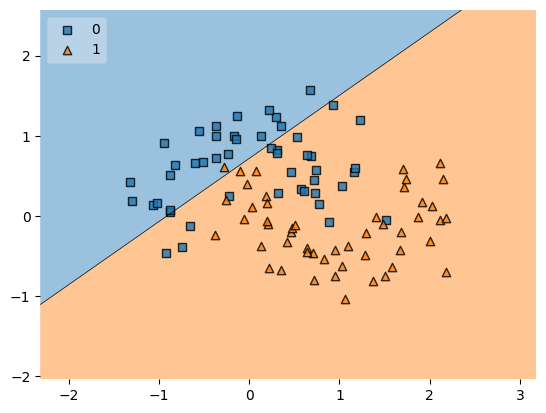

In [39]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [38]:
history = model.fit(x=df[['x','y']], y=df['class'], verbose=1, epochs=500,validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5378 - loss: 0.6081 - val_accuracy: 0.7500 - val_loss: 0.5882
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5456 - loss: 0.6120 - val_accuracy: 0.8000 - val_loss: 0.5872
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5222 - loss: 0.6294 - val_accuracy: 0.8000 - val_loss: 0.5862
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5690 - loss: 0.6034 - val_accuracy: 0.8000 - val_loss: 0.5852
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5807 - loss: 0.5993 - val_accuracy: 0.8000 - val_loss: 0.5842
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6003 - loss: 0.5861 - val_accuracy: 0.8000 - val_loss: 0.5832
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5417 - loss: 0.6136 - val_accuracy: 0.8000 - val_loss: 0.5823
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5558 - loss: 0.6026 - val_accuracy: 0.8000 - val_loss: 0.5814
